# Data Analysis Practical Test E15: Test Notebook

---

#### COMMON: Load Package

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---

## Question No. 1

주어진 데이터 파일은 특정 철강사의 제품코드, 불량코드, 그리고 공정 과정에서 발생한 데이터를 담고 있다.  
해당 데이터를 이용하여 다음 문제의 답변을 작성하시오.

제공 데이터 파일: E15Q1_data_raw.csv  
 - 1-24번 컬럼: Analog Data
 - 25번 컬럼: 제품코드 (Binary)
 - 26번 컬럼: 불량코드 (Integer with range 1 to 7)

#### ① EDA를 실시하여 결과값을 제시하고, 상관분석을 시행하여 변수 선택 및 파생 변수 생성과정을 풀이하시오.

##### Load Data

In [3]:
df=pd.read_csv('./data/E15Q1_data_raw.csv')

##### Check and Transform DType

In [102]:
df.shape

(1941, 27)

In [4]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,SteelType,Fault
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,2,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,2,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  Steel_Plate_Thickness  1941 non-null   int64  
 12  Edges_Index            1941 non-null   float64
 13  Empty_Index            1941 non-null   float64
 14  Square_Index           1941 non-null   float64
 15  Outs

'SteelType', 'Fault' 변수를 범주형으로 변경

In [13]:
df[['SteelType','Fault']]=df[['SteelType','Fault']].astype(str)

In [14]:
df.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
SteelType                 object
Fault                     object
dtype: object

##### EDA: Check missing values

In [15]:
df.isnull().sum()/len(df)

X_Minimum                0.0
X_Maximum                0.0
Y_Minimum                0.0
Y_Maximum                0.0
Pixels_Areas             0.0
X_Perimeter              0.0
Y_Perimeter              0.0
Sum_of_Luminosity        0.0
Minimum_of_Luminosity    0.0
Maximum_of_Luminosity    0.0
Length_of_Conveyer       0.0
Steel_Plate_Thickness    0.0
Edges_Index              0.0
Empty_Index              0.0
Square_Index             0.0
Outside_X_Index          0.0
Edges_X_Index            0.0
Edges_Y_Index            0.0
Outside_Global_Index     0.0
LogOfAreas               0.0
Log_X_Index              0.0
Log_Y_Index              0.0
Orientation_Index        0.0
Luminosity_Index         0.0
SigmoidOfAreas           0.0
SteelType                0.0
Fault                    0.0
dtype: float64

모든 변수에 대하여 결측값은 존재하지 않는다

##### EDA: Check Distributions

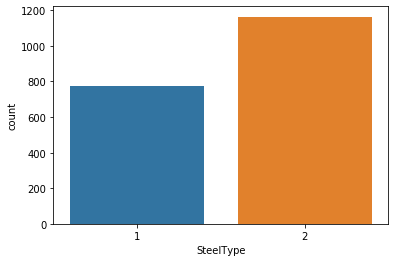

In [72]:
# SteelType 의 분포 확인

sns.countplot(x='SteelType', data=df)

In [73]:
print(df['SteelType'].value_counts())

2    1164
1     777
Name: SteelType, dtype: int64


Type 1 : 777개

Type 2 : 1164개

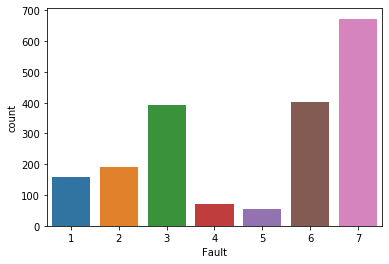

In [74]:
# 불량코드 (Fault) 분포 확인

sns.countplot(x='Fault', data=df)

In [75]:
print(df['Fault'].value_counts())

7    673
6    402
3    391
2    190
1    158
4     72
5     55
Name: Fault, dtype: int64


7 > 6 > 3 > 2 > 1 > 4 순으로 불량코드가 나타나고 있다

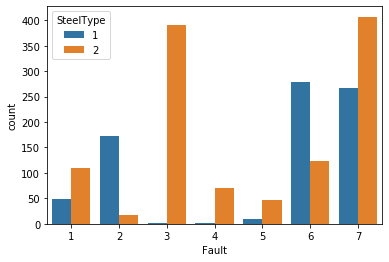

In [76]:
# Fault 별 SteelType 분포 확인

sns.countplot(x='Fault', hue='SteelType', data=df)

In [77]:
# 데이터프레임을 통해 수치로 확인

df_sf=df.groupby('SteelType')['Fault'].value_counts()
df_sf=pd.DataFrame(df_sf)
df_sf.unstack()

Fault                            
Fault         1    2    3   4   5    6    7
SteelType                                  
1            49  172    1   1   9  279  266
2           109   18  390  71  46  123  407

- Fault 4 : SteelType 2에 치우쳐 분포

- Fault 3 : SteelType 2에 치우쳐 분포

- Fault 2 : SteelType 1에 치우쳐 분포  

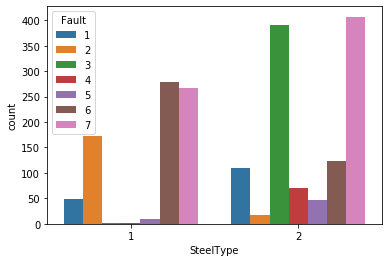

In [78]:
# StreelType 별 Fault 분포 확인

sns.countplot(x='SteelType', hue='Fault', data=df)

타입에 대한 불량코드 크기 순서

- SteelType_1 : 6,7,2,1,5,3,4

- SteelType_2 : 7,3,6,1,4,5,2

### 수치형 변수에 대한 분포 확인

In [79]:
# 수치형변수가 담긴 리스트 생성

numeric=list()

for i in df.columns:
    if type(df[i][0])!=type('aa'):
        numeric.append(i)
        
numeric

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [80]:
df_numeric=df[numeric]

df_numeric.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


#### X_Maximum , X_Minimum

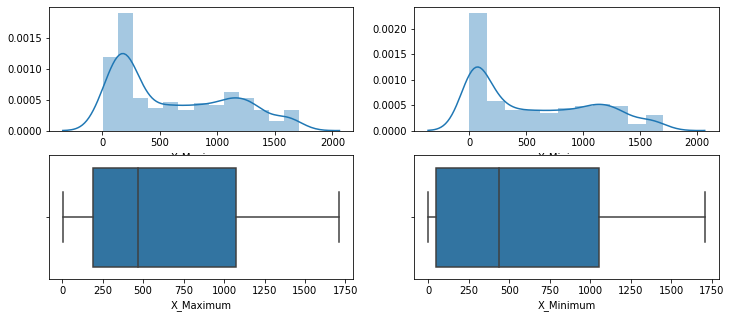

In [81]:
figure, axes=plt.subplots(nrows=2,ncols=2, figsize=(12,5))

sns.distplot(df_numeric['X_Maximum'] ,  ax=axes[0][0])
sns.distplot(df_numeric['X_Minimum'] ,  ax=axes[0][1])
sns.boxplot(df_numeric['X_Maximum'] ,  ax=axes[1][0])
sns.boxplot(df_numeric['X_Minimum'] ,  ax=axes[1][1])

plt.show()

#### Y_Maximum, Y_Minimum

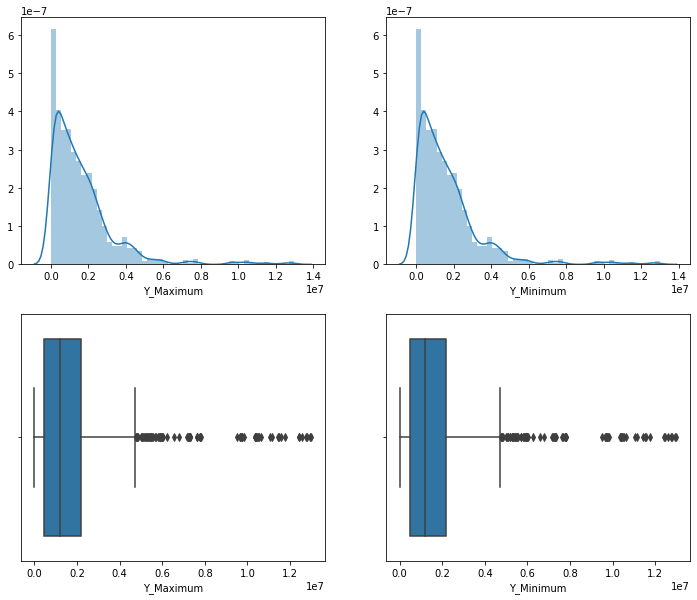

In [82]:
figure, axes=plt.subplots(nrows=2, ncols=2, figsize=(12,10))

sns.distplot(df_numeric['Y_Maximum'] ,  ax=axes[0][0])
sns.distplot(df_numeric['Y_Minimum'] ,  ax=axes[0][1])
sns.boxplot(df_numeric['Y_Maximum'], ax=axes[1][0])
sns.boxplot(df_numeric['Y_Minimum'], ax=axes[1][1])

plt.show()

#### Pixels_Areas, X_Perimeter, Y_Perimeter

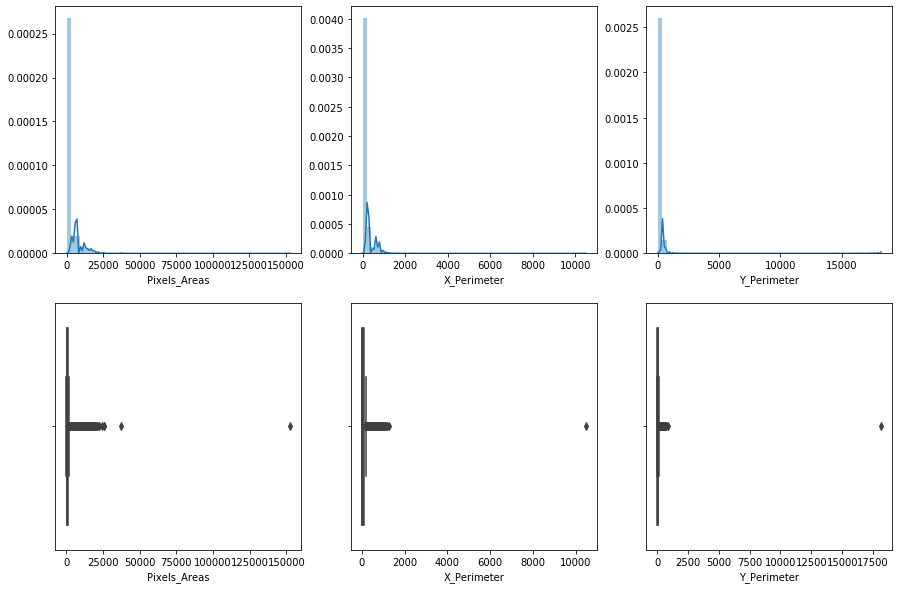

In [83]:
figure, axes=plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sns.distplot(df_numeric['Pixels_Areas'], ax=axes[0][0])
sns.distplot(df_numeric['X_Perimeter'], ax=axes[0][1])
sns.distplot(df_numeric['Y_Perimeter'], ax=axes[0][2])
sns.boxplot(x='Pixels_Areas', data=df, ax=axes[1][0])
sns.boxplot(x='X_Perimeter', data=df, ax=axes[1][1])
sns.boxplot(x='Y_Perimeter', data=df, ax=axes[1][2])

plt.show()

#### Minimum_of_Luminosity, Maximum_of_Luminosity, Luminosity_Index

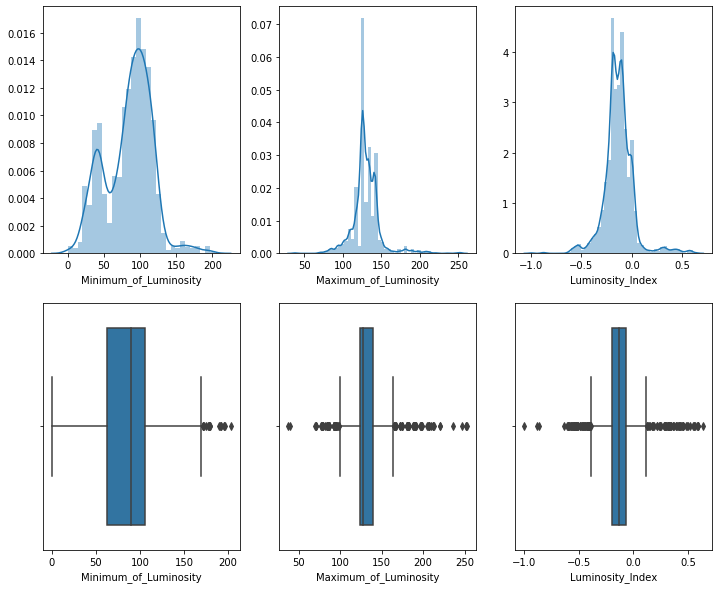

In [84]:
figure, axes=plt.subplots(nrows=2,ncols=3, figsize=(12,10))

sns.distplot(df_numeric['Minimum_of_Luminosity'] ,  ax=axes[0][0])
sns.distplot(df_numeric['Maximum_of_Luminosity'] ,  ax=axes[0][1])
sns.distplot(df_numeric['Luminosity_Index'] ,  ax=axes[0][2])
sns.boxplot(df_numeric['Minimum_of_Luminosity'] ,  ax=axes[1][0])
sns.boxplot(df_numeric['Maximum_of_Luminosity'] ,  ax=axes[1][1])
sns.boxplot(df_numeric['Luminosity_Index'] ,  ax=axes[1][2])

plt.show()

#### Length_of_Conveyer, Steel_Plate_Thickness

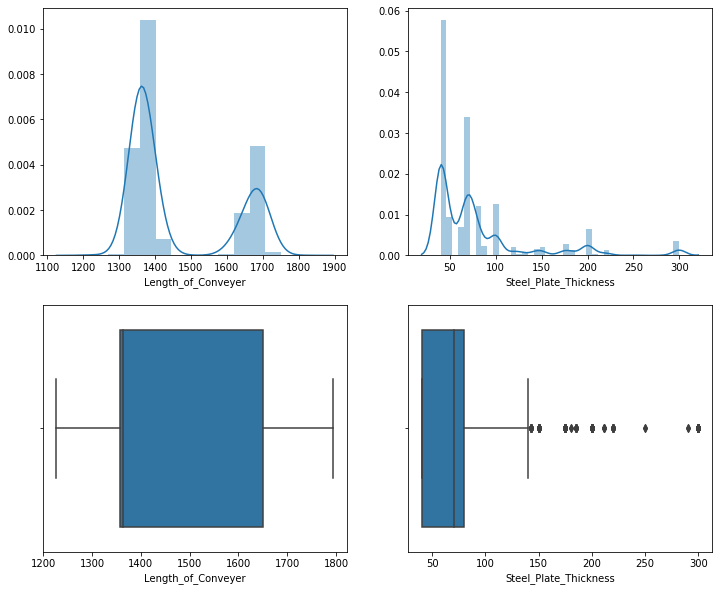

In [85]:
figure, axes=plt.subplots(nrows=2,ncols=2, figsize=(12,10))

sns.distplot(df_numeric['Length_of_Conveyer'], ax=axes[0][0])
sns.distplot(df_numeric['Steel_Plate_Thickness'], ax=axes[0][1])
sns.boxplot(df_numeric['Length_of_Conveyer'], ax=axes[1][0])
sns.boxplot(df_numeric['Steel_Plate_Thickness'], ax=axes[1][1])

plt.show()

#### Edges_Index, Edges_X_Index, Edges_Y_Index

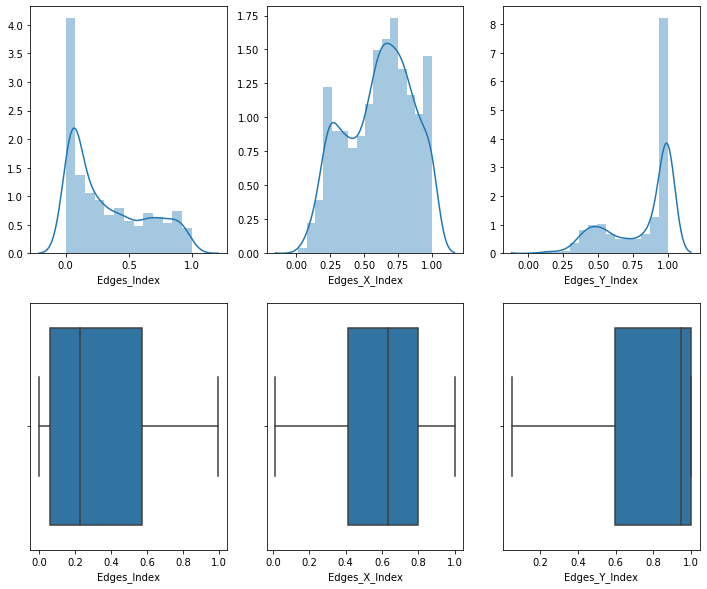

In [88]:
figure, axes=plt.subplots(nrows=2,ncols=3, figsize=(12,10))

sns.distplot(df_numeric['Edges_Index'],ax=axes[0][0])
sns.distplot(df_numeric['Edges_X_Index'],ax=axes[0][1])
sns.distplot(df_numeric['Edges_Y_Index'],ax=axes[0][2])
sns.boxplot(df_numeric['Edges_Index'],ax=axes[1][0])
sns.boxplot(df_numeric['Edges_X_Index'],ax=axes[1][1])
sns.boxplot(df_numeric['Edges_Y_Index'],ax=axes[1][2])

plt.show()

#### Empty_Index, Square_Index, Orientation_Index

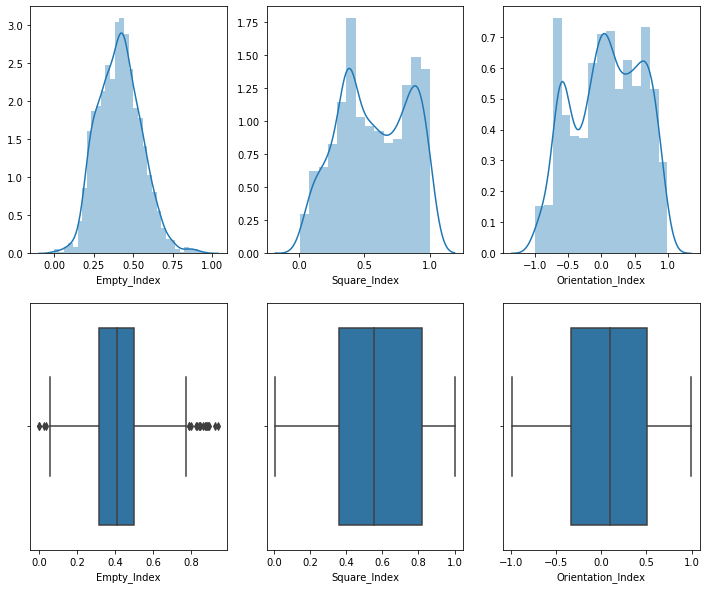

In [87]:
figure, axes=plt.subplots(nrows=2,ncols=3, figsize=(12,10))

sns.distplot(df_numeric['Empty_Index'],ax=axes[0][0])
sns.distplot(df_numeric['Square_Index'],ax=axes[0][1])
sns.distplot(df_numeric['Orientation_Index'],ax=axes[0][2])
sns.boxplot(df_numeric['Empty_Index'],ax=axes[1][0])
sns.boxplot(df_numeric['Square_Index'],ax=axes[1][1])
sns.boxplot(df_numeric['Orientation_Index'],ax=axes[1][2])

plt.show()

#### Ouside_X_Index, Ouside_Global_Index

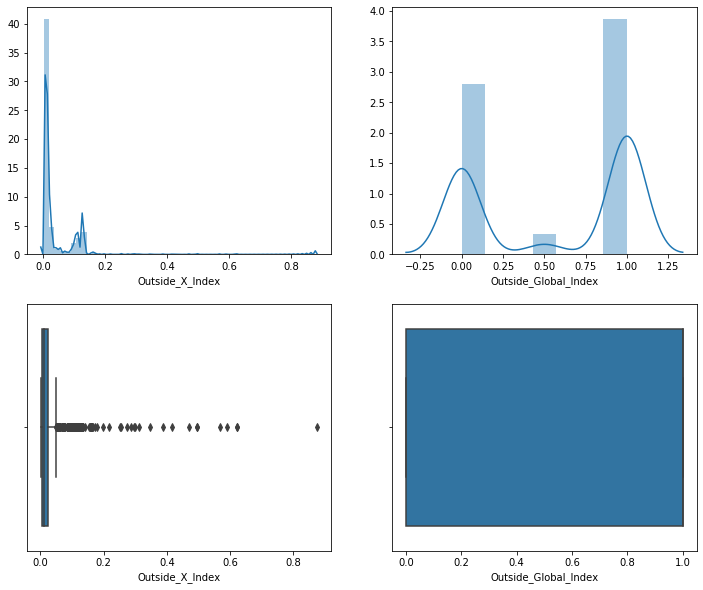

In [89]:
figure, axes=plt.subplots(nrows=2,ncols=2, figsize=(12,10))

sns.distplot(df_numeric['Outside_X_Index'], ax=axes[0][0])
sns.distplot(df_numeric['Outside_Global_Index'], ax=axes[0][1])
sns.boxplot(df_numeric['Outside_X_Index'], ax=axes[1][0])
sns.boxplot(df_numeric['Outside_Global_Index'], ax=axes[1][1])

plt.show()

#### LogOfAreas, Log_X_Index, Log_Y_Index, SigmoidOfAreas

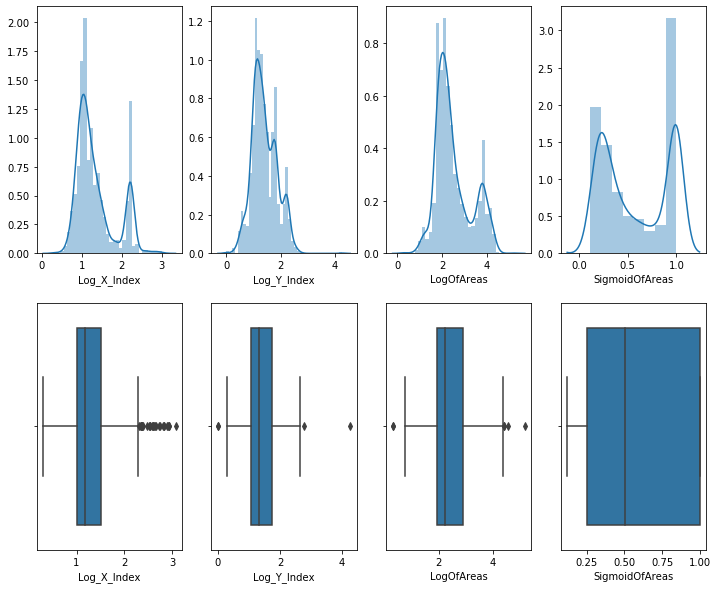

In [90]:
figure, axes=plt.subplots(nrows=2,ncols=4, figsize=(12,10))

sns.distplot(df_numeric['Log_X_Index'],ax=axes[0][0])
sns.distplot(df_numeric['Log_Y_Index'],ax=axes[0][1])
sns.distplot(df_numeric['LogOfAreas'],ax=axes[0][2])
sns.distplot(df_numeric['SigmoidOfAreas'],ax=axes[0][3])

sns.boxplot(df_numeric['Log_X_Index'],ax=axes[1][0])
sns.boxplot(df_numeric['Log_Y_Index'],ax=axes[1][1])
sns.boxplot(df_numeric['LogOfAreas'],ax=axes[1][2])
sns.boxplot(df_numeric['SigmoidOfAreas'],ax=axes[1][3])

plt.show()

### 이상치 제거

In [91]:
def find_outliers(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    
    return np.where((x>upper)|(x<lower))

In [94]:
# boxplot 상 IQR 외부에 있던 변수들의 이상치 제거

outlier_index=set()

for i in numeric:
    outlier_index.update(find_outliers(df[i])[0][:])
    
outlier_index=list(outlier_index)

In [97]:
new_df=df.drop(outlier_index).reset_index()

In [105]:
del new_df['index']

---

#### ② 전체 데이터를 Train, Validataion, Test 용도로 분할하고 시각화하시오. (각 비율: 50%, 30%, 20%)

---

#### ③ 불량코드 1에 대하여, Logistic Regression을 활용하여 이항분류 모형을 생성하시오.
#### 생성한 모형에 대한 최적의 Cut-Off Value를 선정 후, Confusion Matrix를 제시하시오. (반드시 시각화와 통계량을 포함시킬 것)

---

#### ④ Logistic Regression을 제외하고 SVM을 포함하여 3가지 다항 분류 모형을 만들어 Precision과 Sensitivity(TPR)를 제시하시오.
#### 또한 모델향상과정과 최적화 과정을 통해 Confusion Matrix를 도출하시오.

---

#### ⑤ 상기 ③번과 ④번 4가지 모형 중 1가지를 선택하여 최적의 클러스터링 개수(단일집단~5개)를 제시하시오.
#### 또한 군집분석을 이용한 모형성능 향상 과정을 수행하여, 성능향상 전후의 F1 Score와 모형 평가 결과를 제시하시오.

---

## Question No. 2

주어진 3개의 파일들은 한 공장의 전력 사용량에 대한 데이터로써, 각각 날씨와 온도, 용도별 전력량계, 전력 총 사용량을 담고있다.  
해당 데이터를 종합적으로 이용하여 다음 문제를 풀이하시오.

데이터 파일 설명: 
1. E15Q21_usage.csv
    - 900초마다 기록된 900초 단위 전력 총 사용량
    - 1번 컬럼: Datetime (UnixTimestamp)
    - 2번 컬럼: Usage


2. E15Q22_weather.csv
    - 일자별 평균 기온
    - 1번 컬럼: Date (YYYY-MM-DD)
    - 2번 컬럼: Daily Average Temperature


3. E15Q23_usage_history.tsv
    - 1분에 2번씩 기록된 각 용도별 전력 누적사용량
    - 1번 컬럼: Time (HH:MM)
    - 2번 컬럼: Weather Class (A/B/C/D)
    - 3-7번 컬럼: 각 용도(A/B/C/D/E)별 전력 누적 사용량

---

##### LOAD DATA

#### ① 첫번째 제공 파일의 총사용량 컬럼을 용도별로 분류하고, 연월과 사용 목적별로 전력의 하루 평균 사용량을 구하여 도표를 도출하시오.

|YYYYMM|A|B|C|D|E|
|-|-|-|-|-|-|
|202001|__|__|__|__|__|
|202002|__|__|__|__|__|
|202003|__|__|__|__|__|


##### CREATE DIFF FROM CUMSUM

##### CREATE JOIN KEY

##### JOIN DATASETS

---

#### ② 요일별 평균 전력사용량을 도출하시오. 또한 가로축을 요일, 세로축을 평균사용량으로 하여 요일별 평균 사용량을 시각화하여 제출하시오.

---

#### ③ 요일별 총 전력 사용량의 평균값의 차이를 분석하여, 가장 큰 차이를 보이는 요일은 어떤 요일인지 제시하시오.

---

#### ④ 각 날짜별 평균 기온과 용도별 전력사용량의 관계를 분석하여, 기온과 가장 밀접한 관계를 지닌 사용 용도의 종류를 제시하시오.